# ASQ Lab Session on Time Series Modeling
#### Instructor: Ashutosh Dave, FRM
#### This session is in continuation of the ASQ lectures by Vivek Krishnamoorthy

<br>

## Objectives

### 1. Model the conditional mean of a time series using the ARMA/ARIMA models:
- A brief revision of ARMA/ARIMA models
- Data and preliminary analysis
- Experimenting with ARMA/ARIMA models to select the best model
- Interpreting the model summary output
- Use of auto_arima() from pmd library to automatically get the best model
- Forecasting using the ARMA/ARIMA model

### 2. Model the conditional volatility using the ARCH/GARCH models:
- A brief revision of ARCH/GARCH models
- Data and preliminary analysis
- Experimenting with ARCH/GARCH models to select the best model based on different combinatins of:
    - Mean model 
    - Volatility model
    - Distribution of returns   
- Interpreting the model summary output
- Forecasting volatility using ARCH/GARCH models

## Approach
Time series analysis is a relatively involved topic which requires time for one to understand and appreciate fully. However, for this session we will focus on:
- Intuitive understanding 
- Practical implementation

<br>

## 1. Modeling conditional mean of a time series using the ARMA/ARIMA models

### Autoregressive moving-average (ARMA) models

#### ARMA(p, q) model: 
### $$ y_t = \sum_{i=1}^{p} a_i y_{t-i} + \sum_{j=1}^{q} b_j \epsilon_{t-j} + \epsilon_t $$
#### ARMA(1, 1) model: 
### $$ y_t = a_1 y_{t-1} + b_1 \epsilon_{t-1} + \epsilon_t $$

<br>

### Data and preliminary analysis

In [ ]:
# standard imports
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)

In [53]:
# start and end dates
start = dt.datetime(2007,1,1).date()
end = dt.datetime(2021,3,1).date()


# getting data
df = yf.download('^NSEI',start = start, end = end , interval='1d')[['Adj Close']]
df.columns = ['prices']
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [54]:
df

prices
Date                    
2007-09-17   4494.649902
2007-09-18   4546.200195
2007-09-19   4732.350098
2007-09-20   4747.549805
2007-09-21   4837.549805
2007-09-24   4932.200195
2007-09-25   4938.850098
2007-09-26   4940.500000
2007-09-27   5000.549805
2007-09-28   5021.350098
2007-10-01   5068.950195
2007-10-03   5210.799805
2007-10-04   5208.649902
2007-10-05   5185.850098
2007-10-08   5085.100098
2007-10-09   5327.250000
2007-10-10   5441.450195
2007-10-11   5524.850098
2007-10-12   5428.250000
2007-10-15   5670.399902
2007-10-16   5668.049805
2007-10-17   5559.299805
2007-10-18   5351.000000
2007-10-19   5215.299805
2007-10-22   5184.000000
2007-10-23   5473.700195
2007-10-24   5496.149902
2007-10-25   5568.950195
2007-10-26   5702.299805
2007-10-29   5905.899902
2007-10-30   5868.750000
2007-10-31   5900.649902
2007-11-01   5866.450195
2007-11-02   5932.399902
2007-11-05   5847.299805
2007-11-06   5786.500000
2007-11-07   5782.350098
2007-11-08   5698.750000
2007-11-12   5617.100098
2007-11-13   5695.399902
2007-11-14   5937.899902
2007-11-15   5912.100098
2007-11-16   5906.850098
2007-11-19   5907.649902
2007-11-20   5780.899902
2007-11-21   5561.049805
2007-11-22   5519.350098
2007-11-23   5608.600098
2007-11-26   5731.700195
2007-11-27   5698.149902
2007-11-28   5617.549805
2007-11-29   5634.600098
2007-11-30   5762.750000
2007-12-03   5865.000000
2007-12-04   5858.350098
2007-12-05   5940.000000
2007-12-06   5954.700195
2007-12-07   5974.299805
2007-12-10   5960.600098
2007-12-11   6097.250000
2007-12-12   6159.299805
2007-12-13   6058.100098
2007-12-14   6047.700195
2007-12-17   5777.000000
2007-12-18   5742.299805
2007-12-19   5751.149902
2007-12-20   5766.500000
2007-12-24   5985.100098
2007-12-26   6070.750000
2007-12-27   6081.500000
2007-12-28   6079.700195
2007-12-31   6138.600098
2008-01-01   6144.350098
2008-01-02   6179.399902
2008-01-03   6178.549805
2008-01-04   6274.299805
2008-01-07   6279.100098
2008-01-08   6287.850098
2008-01-09   6272.000000
2008-01-10   6156.950195
2008-01-11   6200.100098
2008-01-14   6206.799805
2008-01-15   6074.250000
2008-01-16   5935.750000
2008-01-17   5913.200195
2008-01-18   5705.299805
2008-01-21   5208.799805
2008-01-22   4899.299805
2008-01-23   5203.399902
2008-01-24   5033.450195
2008-01-25   5383.350098
2008-01-28   5274.100098
2008-01-29   5280.799805
2008-01-30   5167.600098
2008-01-31   5137.450195
2008-02-01   5317.250000
2008-02-04   5463.500000
2008-02-05   5483.899902
2008-02-06   5322.549805
2008-02-07   5133.250000
2008-02-08   5120.350098
2008-02-11   4857.000000
2008-02-12   4838.250000
2008-02-13   4929.450195
2008-02-14   5202.000000
2008-02-15   5302.899902
2008-02-18   5276.899902
2008-02-19   5280.799805
2008-02-20   5154.450195
2008-02-21   5191.799805
2008-02-22   5110.750000
2008-02-25   5200.700195
2008-02-26   5270.049805
2008-02-27   5268.399902
2008-02-28   5285.100098
2008-02-29   5223.500000
2008-03-03   4953.000000
2008-03-04   4864.250000
2008-03-05   4921.399902
2008-03-07   4771.600098
2008-03-10   4800.399902
2008-03-11   4865.899902
2008-03-12   4872.000000
2008-03-13   4623.600098
2008-03-14   4745.799805
2008-03-17   4503.100098
2008-03-18   4533.000000
2008-03-19   4573.950195
2008-03-24   4609.850098
2008-03-25   4877.500000
2008-03-26   4828.850098
2008-03-27   4830.250000
2008-03-28   4942.000000
2008-03-31   4734.500000
2008-04-01   4739.549805
2008-04-02   4754.200195
2008-04-03   4771.600098
2008-04-04   4647.000000
2008-04-07   4761.200195
2008-04-08   4709.649902
2008-04-09   4747.049805
2008-04-10   4733.000000
2008-04-11   4777.799805
2008-04-15   4879.649902
2008-04-16   4887.299805
2008-04-17   4958.399902
2008-04-21   5037.000000
2008-04-22   5049.299805
2008-04-23   5022.799805
2008-04-24   4999.850098
2008-04-25   5111.700195
2008-04-28   5089.649902
2008-04-29   5195.500000
2008-04-30   5165.899902
2008-05-02   5228.200195
2008-05-05   5192.250000
2008-05-06   5144.649902
2008-05-07   5135.500000
2008-05-08   5081.

In [2]:
init_notebook_mode(connected = True)
cf.go_offline()
# plotting price series
df['prices'].iplot();

#### Questions:
- Is this time series stationary or not?
- How can we transform to make it stationary?

In [3]:
# Log transformation
df['log_prices'] = np.log(df['prices'])
df['log_prices'].iplot();

In [4]:
# Differencing
df['returns'] = (df['log_prices'] - df['log_prices'].shift())*100
df.dropna(inplace=True)

In [5]:
# plotting return series
df['returns'].iplot();

**Questions**
- Which test can be used to check the stationarity of a time series?
- Do returns exhibit serial correlation? How can we check that visually?
- Do returns exhibit significant seasonality? How can we check that visually?

In [6]:
# ADF test
# Null hypothesis: The series is NOT stationary
# Decision criterion: Reject Null hypothesis if p-value < 0.05


from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['returns'])

p_value = test_result[1]
print('p-value of ADF test is:',p_value)

if p_value < 0.05:
    print('The series is stationary with 95% confidence')
else:
    print('The series is NOT stationary with 95% confidence')

p-value of ADF test is: 2.4365354093682187e-28
The series is stationary with 95% confidence


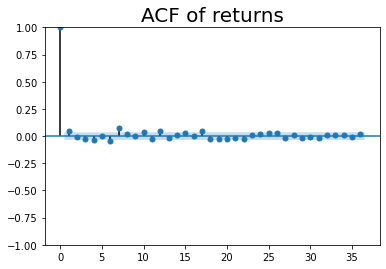

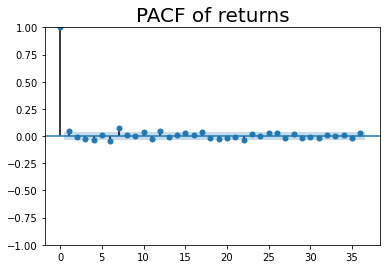

In [7]:
### Plotting ACF and PACF
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['returns'])
plt.title('ACF of returns', size =20)
plt.show();

plot_pacf(df['returns'])
plt.title('PACF of returns', size =20)
plt.show();

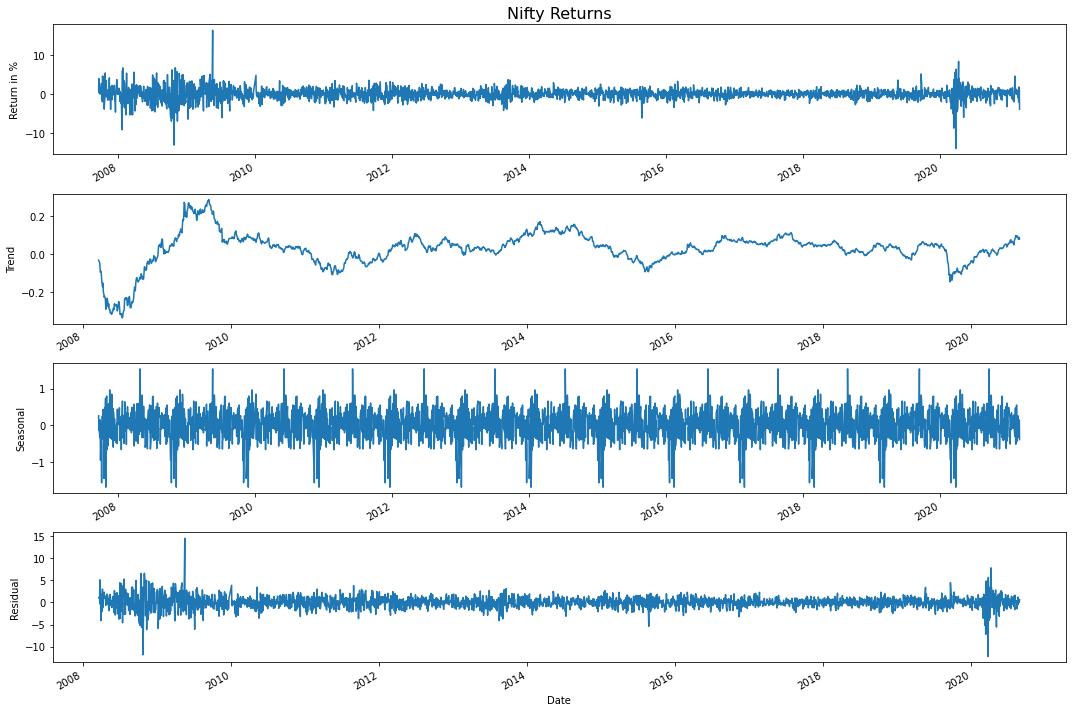

In [8]:
# Decomposing the return series

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_series = seasonal_decompose(df['returns'],period=252)

fig, ax = plt.subplots(4, 1, figsize=(15, 10))

decompose_series.observed.plot(ax=ax[0])
ax[0].set_title("Nifty Returns", fontsize=16)
ax[0].set(xlabel="", ylabel="Return in %")

decompose_series.trend.plot(ax=ax[1])
ax[1].set(xlabel="", ylabel="Trend")

decompose_series.seasonal.plot(ax=ax[2])
ax[2].set(xlabel="", ylabel="Seasonal")

decompose_series.resid.plot(ax=ax[3])
ax[3].set(xlabel="Date", ylabel="Residual")

plt.tight_layout()
plt.show();

In [9]:
# Looking at seasonality in little more detail
decompose_series.seasonal.iplot()

**Question**
- What could be a good model for this data?

<br>

### Train-test split and fitting the first ARMA model

In [10]:
# Train-Test split: 

train_size = int(len(df)*0.8)
train_df, test_df = df.iloc[:train_size], df.iloc[train_size:]

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2627 entries, 2007-09-18 to 2018-06-22
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   prices      2627 non-null   float64
 1   log_prices  2627 non-null   float64
 2   returns     2627 non-null   float64
dtypes: float64(3)
memory usage: 82.1 KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 657 entries, 2018-06-25 to 2021-02-26
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   prices      657 non-null    float64
 1   log_prices  657 non-null    float64
 2   returns     657 non-null    float64
dtypes: float64(3)
memory usage: 20.5 KB


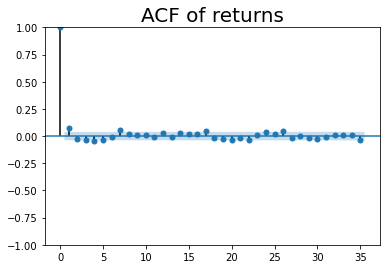

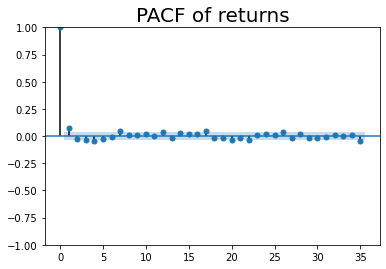

In [13]:
### Plotting ACF and PACF for training data
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train_df['returns'])
plt.title('ACF of returns', size =20)
plt.show();

plot_pacf(train_df['returns'])
plt.title('PACF of returns', size =20)
plt.show();

In [14]:
train_df

prices  log_prices    returns
Date                                           
2007-09-18   4546.200195    8.422047   1.140398
2007-09-19   4732.350098    8.462177   4.013017
2007-09-20   4747.549805    8.465384   0.320673
2007-09-21   4837.549805    8.484164   1.877970
2007-09-24   4932.200195    8.503540   1.937682
2007-09-25   4938.850098    8.504888   0.134735
2007-09-26   4940.500000    8.505222   0.033401
2007-09-27   5000.549805    8.517303   1.208133
2007-09-28   5021.350098    8.521454   0.415097
2007-10-01   5068.950195    8.530889   0.943489
2007-10-03   5210.799805    8.558489   2.759962
2007-10-04   5208.649902    8.558076  -0.041267
2007-10-05   5185.850098    8.553689  -0.438690
2007-10-08   5085.100098    8.534070  -1.961907
2007-10-09   5327.250000    8.580590   4.652044
2007-10-10   5441.450195    8.601801   2.121045
2007-10-11   5524.850098    8.617011   1.521051
2007-10-12   5428.250000    8.599372  -1.763932
2007-10-15   5670.399902    8.643015   4.364285
2007-10-16   5668.049805    8.642600  -0.041454
2007-10-17   5559.299805    8.623227  -1.937294
2007-10-18   5351.000000    8.585039  -3.818871
2007-10-19   5215.299805    8.559352  -2.568688
2007-10-22   5184.000000    8.553332  -0.601962
2007-10-23   5473.700195    8.607710   5.437788
2007-10-24   5496.149902    8.611803   0.409299
2007-10-25   5568.950195    8.624962   1.315873
2007-10-26   5702.299805    8.648625   2.366301
2007-10-29   5905.899902    8.683707   3.508227
2007-10-30   5868.750000    8.677397  -0.631017
2007-10-31   5900.649902    8.682818   0.542083
2007-11-01   5866.450195    8.677005  -0.581278
2007-11-02   5932.399902    8.688184   1.117912
2007-11-05   5847.299805    8.673735  -1.444885
2007-11-06   5786.500000    8.663283  -1.045236
2007-11-07   5782.350098    8.662565  -0.071743
2007-11-08   5698.750000    8.648002  -1.456334
2007-11-12   5617.100098    8.633571  -1.443132
2007-11-13   5695.399902    8.647414   1.384328
2007-11-14   5937.899902    8.689111   4.169670
2007-11-15   5912.100098    8.684756  -0.435440
2007-11-16   5906.850098    8.683868  -0.088840
2007-11-19   5907.649902    8.684003   0.013539
2007-11-20   5780.899902    8.662315  -2.168874
2007-11-21   5561.049805    8.623542  -3.877246
2007-11-22   5519.350098    8.616015  -0.752679
2007-11-23   5608.600098    8.632056   1.604103
2007-11-26   5731.700195    8.653767   2.171105
2007-11-27   5698.149902    8.647897  -0.587066
2007-11-28   5617.549805    8.633651  -1.424595
2007-11-29   5634.600098    8.636681   0.303059
2007-11-30   5762.750000    8.659170   2.248861
2007-12-03   5865.000000    8.676758   1.758769
2007-12-04   5858.350098    8.675623  -0.113447
2007-12-05   5940.000000    8.689464   1.384112
2007-12-06   5954.700195    8.691936   0.247172
2007-12-07   5974.299805    8.695222   0.328605
2007-12-10   5960.600098    8.692926  -0.229574
2007-12-11   6097.250000    8.715593   2.266669
2007-12-12   6159.299805    8.725718   1.012525
2007-12-13   6058.100098    8.709152  -1.656687
2007-12-14   6047.700195    8.707433  -0.171817
2007-12-17   5777.000000    8.661640  -4.579355
2007-12-18   5742.299805    8.655615  -0.602472
2007-12-19   5751.149902    8.657155   0.154002
2007-12-20   5766.500000    8.659821   0.266549
2007-12-24   5985.100098    8.697028   3.720775
2007-12-26   6070.750000    8.711237   1.420909
2007-12-27   6081.500000    8.713007   0.176922
2007-12-28   6079.700195    8.712711  -0.029599
2007-12-31   6138.600098    8.722352   0.964133
2008-01-01   6144.350098    8.723288   0.093626
2008-01-02   6179.399902    8.728976   0.568819
2008-01-03   6178.549805    8.728839  -0.013758
2008-01-04   6274.299805    8.744217   1.537831
2008-01-07   6279.100098    8.744982   0.076478
2008-01-08   6287.850098    8.746374   0.139254
2008-01-09   6272.000000    8.743851  -0.252393
2008-01-10   6156.950195    8.725337  -1.851373
2008-01-11   6200.100098    8.732321   0.698388
2008-01-14   6206.799805    8.733401   0.108000
2008-01-15   6074.250000    8.7118

In [15]:
# Importing statsmodels libraries for fitting ARMA/ARIMA models
import statsmodels.tsa.api as smt
import statsmodels.api as sm

# To avoid seeing unnecessary warnings
warnings.simplefilter('ignore')

# Set the data frequency to daily
train_df = train_df.asfreq('d').dropna()
train_df.dropna(inplace=True)

In [16]:
# Use the SARIMAX function from statsmodels.api
arima_mod = smt.SARIMAX(train_df['prices'], order=(5, 1, 5))
arima_result = arima_mod.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 prices   No. Observations:                 2627
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -15050.947
Date:                Wed, 13 Oct 2021   AIC                          30123.893
Time:                        18:48:56   BIC                          30188.499
Sample:                             0   HQIC                         30147.290
                               - 2627                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7273      0.157     -4.625      0.000      -1.036      -0.419
ar.L2         -0.0227      0.024     -0.928      0.353      -0.070       0.025
ar.L3         -0.0605      0.026     -2.355      0.019      -0.111      -0.010
ar.L4         -0.9642      0.024    -39.974      0.000      -1.012      -0.917
ar.L5         -0.6637      0.148     -4.486      0.000      -0.954      -0.374
ma.L1          0.7922      0.151      5.258      0.000       0.497       1.087
ma.L2          0.0607      0.029      2.104      0.035       0.004       0.117
ma.L3          0.0512      0.029      1.736      0.082      -0.007       0.109
ma.L4          0.9560      0.028     34.569      0.000       0.902       1.010
ma.L5          0.7025      0.140      5.018      0.000       0.428       0.977
sigma2      5569.9739     95.329     58.429      0.000    5383.132    5756.816
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):              1922.97
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Interpreting the output

#### The Jarque-Bera test for normality: Null hypothesis is that the standardized residuals are normally distributed
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_normality.html

#### The Ljung-Box test for autocorrelation: Null hypothesis is that the standardized residuals are not serially correlated 
https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_serial_correlation.html

#### Information criteria for model selection
https://www.vosesoftware.com/riskwiki/ComparingfittedmodelsusingtheSICHQICorAICinformationcritereon.php

<br>

### Experimenting with other ARMA/ARIMA models to select best model

In [17]:
# Use the SARIMAX function from statsmodels.api
arima_mod = smt.SARIMAX(train_df['returns'], order=(5, 0, 5))
arima_result = arima_mod.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 2627
Model:               SARIMAX(5, 0, 5)   Log Likelihood               -4656.686
Date:                Wed, 13 Oct 2021   AIC                           9335.371
Time:                        18:48:59   BIC                           9399.981
Sample:                             0   HQIC                          9358.768
                               - 2627                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2311      0.242     -0.956      0.339      -0.705       0.243
ar.L2         -0.0805      0.192     -0.419      0.675      -0.457       0.296
ar.L3         -0.3249      0.194     -1.673      0.094      -0.705       0.056
ar.L4         -0.5184      0.207     -2.504      0.012      -0.924      -0.113
ar.L5         -0.5556      0.140     -3.981      0.000      -0.829      -0.282
ma.L1          0.2971      0.240      1.239      0.215      -0.173       0.767
ma.L2          0.0795      0.183      0.434      0.665      -0.280       0.439
ma.L3          0.3178      0.182      1.745      0.081      -0.039       0.675
ma.L4          0.5301      0.195      2.723      0.006       0.149       0.912
ma.L5          0.5687      0.138      4.133      0.000       0.299       0.838
sigma2         2.0113      0.025     79.205      0.000       1.962       2.061
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):             14404.61
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Use the SARIMAX function from statsmodels.api
arima_mod = smt.SARIMAX(train_df['returns'], order=(4, 0, 4))
arima_result = arima_mod.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 2627
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -4654.794
Date:                Wed, 13 Oct 2021   AIC                           9327.589
Time:                        18:49:01   BIC                           9380.451
Sample:                             0   HQIC                          9346.732
                               - 2627                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1263      0.025      4.996      0.000       0.077       0.176
ar.L2         -0.1896      0.027     -7.152      0.000      -0.242      -0.138
ar.L3          0.0583      0.025      2.340      0.019       0.009       0.107
ar.L4         -0.9407      0.023    -41.526      0.000      -0.985      -0.896
ma.L1         -0.0962      0.025     -3.816      0.000      -0.146      -0.047
ma.L2          0.1772      0.025      7.029      0.000       0.128       0.227
ma.L3         -0.0544      0.024     -2.294      0.022      -0.101      -0.008
ma.L4          0.9435      0.022     42.463      0.000       0.900       0.987
sigma2         2.0129      0.026     78.506      0.000       1.963       2.063
===================================================================================
Ljung-Box (L1) (Q):                   4.91   Jarque-Bera (JB):             15136.84
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
arima_mod = smt.SARIMAX(train_df['returns'], order=([1,3,4,5], 0, [1,3,4]))
arima_result = arima_mod.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                 returns   No. Observations:                 2627
Model:             SARIMAX([1, 3, 4, 5], 0, [1, 3, 4])   Log Likelihood               -4653.074
Date:                                 Wed, 13 Oct 2021   AIC                           9322.148
Time:                                         18:49:04   BIC                           9369.137
Sample:                                              0   HQIC                          9339.164
                                                - 2627                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0151      0.013      1.160      0.246      -0.010       0.041
ar.L3         -0.0445      0.005     -9.175      0.000      -0.054      -0.035
ar.L4         -0.9884      0.007   -150.327      0.000      -1.001      -0.975
ar.L5          0.0524      0.012      4.497      0.000       0.030       0.075
ma.L1          0.0433      0.006      7.814      0.000       0.032       0.054
ma.L3          0.0354      0.006      6.367      0.000       0.025       0.046
ma.L4          0.9893      0.007    150.709      0.000       0.976       1.002
sigma2         2.0245      0.024     84.257      0.000       1.977       2.072
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):             14331.33
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# Use the SARIMAX function from statsmodels.api
arima_mod = smt.SARIMAX(train_df['returns'], order=(3, 0, 2))
arima_result = arima_mod.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 2627
Model:               SARIMAX(3, 0, 2)   Log Likelihood               -4660.532
Date:                Wed, 13 Oct 2021   AIC                           9333.064
Time:                        18:49:06   BIC                           9368.305
Sample:                             0   HQIC                          9345.826
                               - 2627                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8603      0.047     39.826      0.000       1.769       1.952
ar.L2         -1.0404      0.049    -21.126      0.000      -1.137      -0.944
ar.L3          0.1061      0.013      7.956      0.000       0.080       0.132
ma.L1         -1.7842      0.044    -40.299      0.000      -1.871      -1.697
ma.L2          0.8631      0.044     19.629      0.000       0.777       0.949
sigma2         2.0345      0.023     88.061      0.000       1.989       2.080
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             14566.80
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# Use the SARIMAX function from statsmodels.api
arima_mod = smt.SARIMAX(train_df['returns'], order=(2, 0, 3))
arima_result = arima_mod.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 2627
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -4659.486
Date:                Wed, 13 Oct 2021   AIC                           9330.971
Time:                        18:49:07   BIC                           9366.213
Sample:                             0   HQIC                          9343.733
                               - 2627                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3665      0.032     42.134      0.000       1.303       1.430
ar.L2         -0.9128      0.031    -29.597      0.000      -0.973      -0.852
ma.L1         -1.2908      0.034    -37.653      0.000      -1.358      -1.224
ma.L2          0.8039      0.032     25.237      0.000       0.741       0.866
ma.L3          0.0481      0.014      3.537      0.000       0.021       0.075
sigma2         2.0331      0.022     92.368      0.000       1.990       2.076
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             15532.88
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<br>

### Use of auto_arima() from pmd library to automatically get the best model

#### Documentation: https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html
#### Methodology: https://www.researchgate.net/publication/222105759_Automatic_Time_Series_Forecasting_The_forecast_Package_for_R

In [22]:
## Finding the best model using autoarima()
import pmdarima as pm

arima_model = pm.auto_arima(train_df['prices'],
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True,
                            seasonal=False)

arima_model

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [23]:
import pmdarima as pm

## Finding the best model using autoarima()
arima_model = pm.auto_arima(train_df['returns'],
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=False,
                            seasonal=False)

arima_model

ARIMA(order=(2, 0, 3), scoring_args={}, with_intercept=False)

<br>

### Fitting and examining the best model

In [24]:
# Use the SARIMAX function from statsmodels.api
arima_mod = smt.SARIMAX(train_df['returns'], order=(2, 0, 3))
arima_result = arima_mod.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 2627
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -4659.486
Date:                Wed, 13 Oct 2021   AIC                           9330.971
Time:                        18:49:39   BIC                           9366.213
Sample:                             0   HQIC                          9343.733
                               - 2627                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3665      0.032     42.134      0.000       1.303       1.430
ar.L2         -0.9128      0.031    -29.597      0.000      -0.973      -0.852
ma.L1         -1.2908      0.034    -37.653      0.000      -1.358      -1.224
ma.L2          0.8039      0.032     25.237      0.000       0.741       0.866
ma.L3          0.0481      0.014      3.537      0.000       0.021       0.075
sigma2         2.0331      0.022     92.368      0.000       1.990       2.076
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             15532.88
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<br>

### Predictions and forecasts using selected model

In [25]:
# In-sample predictions using predict()
train_df['in_sample_pred'] = arima_result.predict(start= train_df.index[0],end=train_df.index[-1])

train_df[['returns','in_sample_pred']].iplot()

In [26]:
# Another ways is to get a prediction range along with point prediction using the get_prediction()
predict = arima_result.get_prediction()
predict.summary_frame()

returns         mean   mean_se  mean_ci_lower  mean_ci_upper
Date                                                        
2007-09-18  0.000000  1.435498      -2.813525       2.813525
2007-09-19  0.091037  1.430917      -2.713508       2.895583
2007-09-20  0.309321  1.430787      -2.494970       3.113612
2007-09-21 -0.055584  1.429981      -2.858296       2.747128
2007-09-24 -0.019096  1.429040      -2.819964       2.781771
2007-09-25 -0.041124  1.428775      -2.841472       2.759224
2007-09-26 -0.152921  1.428751      -2.953221       2.647380
2007-09-27 -0.082850  1.428317      -2.882299       2.716599
2007-09-28  0.114333  1.427755      -2.684016       2.912682
2007-10-01  0.119705  1.427570      -2.678281       2.917690
2007-10-03  0.151429  1.427564      -2.646545       2.949403
2007-10-04  0.222493  1.427333      -2.575028       3.020015
2007-10-05 -0.104303  1.426998      -2.901169       2.692562
2007-10-08 -0.216913  1.426871      -3.013529       2.579702
2007-10-09 -0.310816  1.426870      -3.107430       2.485799
2007-10-10  0.329897  1.426748      -2.466479       3.126272
2007-10-11  0.241228  1.426550      -2.554758       3.037214
2007-10-12  0.167524  1.426463      -2.628293       2.963341
2007-10-15 -0.192996  1.426463      -2.988813       2.602821
2007-10-16  0.204201  1.426400      -2.591491       2.999894
2007-10-17 -0.155920  1.426283      -2.951382       2.639543
2007-10-18 -0.288990  1.426225      -3.084340       2.506360
2007-10-19 -0.337853  1.426225      -3.133202       2.457496
2007-10-22 -0.067151  1.426192      -2.862437       2.728134
2007-10-23  0.250248  1.426123      -2.544902       3.045398
2007-10-24  0.748210  1.426085      -2.046866       3.543286
2007-10-25  0.175925  1.426084      -2.619149       2.970999
2007-10-26 -0.069646  1.426068      -2.864688       2.725396
2007-10-29 -0.211728  1.426028      -3.006691       2.583236
2007-10-30 -0.154815  1.426003      -2.949730       2.640100
2007-10-31 -0.343155  1.426002      -3.138068       2.451758
2007-11-01 -0.029648  1.425994      -2.824545       2.765249
2007-11-02  0.111455  1.425971      -2.683396       2.906307
2007-11-05  0.358367  1.425955      -2.436453       3.153188
2007-11-06  0.115068  1.425954      -2.679750       2.909886
2007-11-07 -0.012792  1.425950      -2.807602       2.782018
2007-11-08 -0.087205  1.425937      -2.881989       2.707580
2007-11-12 -0.260561  1.425927      -3.055326       2.534204
2007-11-13 -0.219601  1.425925      -3.014363       2.575162
2007-11-14  0.122290  1.425924      -2.672469       2.917049
2007-11-15  0.442385  1.425916      -2.352359       3.237129
2007-11-16  0.062423  1.425910      -2.732309       2.857154
2007-11-19 -0.039649  1.425909      -2.834379       2.755081
2007-11-20 -0.132872  1.425908      -2.927600       2.661856
2007-11-21 -0.312606  1.425904      -3.107326       2.482114
2007-11-22 -0.351334  1.425900      -3.146046       2.443379
2007-11-23  0.065391  1.425899      -2.729320       2.860101
2007-11-26  0.398846  1.425899      -2.395864       3.193556
2007-11-27  0.432537  1.425896      -2.362169       3.227242
2007-11-28  0.030685  1.425894      -2.764016       2.825385
2007-11-29 -0.266738  1.425893      -3.061438       2.527961
2007-11-30 -0.239849  1.425893      -3.034549       2.554850
2007-12-03 -0.027942  1.425892      -2.822639       2.766754
2007-12-04  0.072260  1.425890      -2.722434       2.866953
2007-12-05  0.035222  1.425890      -2.759470       2.829915
2007-12-06  0.190451  1.425890      -2.604242       2.985144
2007-12-07  0.076494  1.425889      -2.718198       2.871185
2007-12-10  0.008460  1.425888      -2.786229       2.803150
2007-12-11 -0.101025  1.425888      -2.895714       2.693664
2007-12-12  0.071515  1.425888      -2.723174       2.866204
2007-12-13 -0.008235  1.425888      -2.802923       2.786453
2007-12-14 -0.189959  1.425887      -2.984646       2.604728
2007-12-17 -0.025827  1.425887      -2.820514       2.768860
2007-12-18 -0.287839  1.425887     

In [27]:
# merging data
train_df_pred = pd.concat([train_df,predict.summary_frame()],axis=1)
train_df_pred

prices  log_prices    returns  in_sample_pred      mean  \
Date                                                                        
2007-09-18   4546.200195    8.422047   1.140398        0.000000  0.000000   
2007-09-19   4732.350098    8.462177   4.013017        0.091037  0.091037   
2007-09-20   4747.549805    8.465384   0.320673        0.309321  0.309321   
2007-09-21   4837.549805    8.484164   1.877970       -0.055584 -0.055584   
2007-09-24   4932.200195    8.503540   1.937682       -0.019096 -0.019096   
2007-09-25   4938.850098    8.504888   0.134735       -0.041124 -0.041124   
2007-09-26   4940.500000    8.505222   0.033401       -0.152921 -0.152921   
2007-09-27   5000.549805    8.517303   1.208133       -0.082850 -0.082850   
2007-09-28   5021.350098    8.521454   0.415097        0.114333  0.114333   
2007-10-01   5068.950195    8.530889   0.943489        0.119705  0.119705   
2007-10-03   5210.799805    8.558489   2.759962        0.151429  0.151429   
2007-10-04   5208.649902    8.558076  -0.041267        0.222493  0.222493   
2007-10-05   5185.850098    8.553689  -0.438690       -0.104303 -0.104303   
2007-10-08   5085.100098    8.534070  -1.961907       -0.216913 -0.216913   
2007-10-09   5327.250000    8.580590   4.652044       -0.310816 -0.310816   
2007-10-10   5441.450195    8.601801   2.121045        0.329897  0.329897   
2007-10-11   5524.850098    8.617011   1.521051        0.241228  0.241228   
2007-10-12   5428.250000    8.599372  -1.763932        0.167524  0.167524   
2007-10-15   5670.399902    8.643015   4.364285       -0.192996 -0.192996   
2007-10-16   5668.049805    8.642600  -0.041454        0.204201  0.204201   
2007-10-17   5559.299805    8.623227  -1.937294       -0.155920 -0.155920   
2007-10-18   5351.000000    8.585039  -3.818871       -0.288990 -0.288990   
2007-10-19   5215.299805    8.559352  -2.568688       -0.337853 -0.337853   
2007-10-22   5184.000000    8.553332  -0.601962       -0.067151 -0.067151   
2007-10-23   5473.700195    8.607710   5.437788        0.250248  0.250248   
2007-10-24   5496.149902    8.611803   0.409299        0.748210  0.748210   
2007-10-25   5568.950195    8.624962   1.315873        0.175925  0.175925   
2007-10-26   5702.299805    8.648625   2.366301       -0.069646 -0.069646   
2007-10-29   5905.899902    8.683707   3.508227       -0.211728 -0.211728   
2007-10-30   5868.750000    8.677397  -0.631017       -0.154815 -0.154815   
2007-10-31   5900.649902    8.682818   0.542083       -0.343155 -0.343155   
2007-11-01   5866.450195    8.677005  -0.581278       -0.029648 -0.029648   
2007-11-02   5932.399902    8.688184   1.117912        0.111455  0.111455   
2007-11-05   5847.299805    8.673735  -1.444885        0.358367  0.358367   
2007-11-06   5786.500000    8.663283  -1.045236        0.115068  0.115068   
2007-11-07   5782.350098    8.662565  -0.071743       -0.012792 -0.012792   
2007-11-08   5698.750000    8.648002  -1.456334       -0.087205 -0.087205   
2007-11-12   5617.100098    8.633571  -1.443132       -0.260561 -0.260561   
2007-11-13   5695.399902    8.647414   1.384328       -0.219601 -0.219601   
2007-11-14   5937.899902    8.689111   4.169670        0.122290  0.122290   
2007-11-15   5912.100098    8.684756  -0.435440        0.442385  0.442385   
2007-11-16   5906.850098    8.683868  -0.088840        0.062423  0.062423   
2007-11-19   5907.649902    8.684003   0.013539       -0.039649 -0.039649   
2007-11-20   5780.899902    8.662315  -2.168874       -0.132872 -0.132872   
2007-11-21   5561.049805    8.623542  -3.877246       -0.312606 -0.312606   
2007-11-22   5519.350098    8.616015  -0.752679       -0.351334 -0.351334   
2007-11-23   5608.600098    8.632056   1.604103        0.065391  0.065391   
2007-11-26   5731.700195    8.653767   2.171105        0.398846  0.398846   
2007-11-27   5698.149902    8.647897  -0.587066        0.432537  0.432537   
2007-11-28   5617.549805    8.633651  -1.424595        0.030685  0.030685   
2007-11-29   5

In [28]:
# Plotting point estimate with 95% CI
train_df_pred[['returns','in_sample_pred','mean_ci_lower','mean_ci_upper']].iplot()

In [29]:
# Out of sample forecasts using the 'get_forecast' method

forecast = arima_result.get_forecast(steps =len(test_df))
test_df_forecast = forecast.summary_frame()
test_df_forecast.head()

returns      mean   mean_se  mean_ci_lower  mean_ci_upper
2627     0.040721  1.425885      -2.753963       2.835404
2628    -0.022735  1.429964      -2.825413       2.779944
2629    -0.031032  1.429986      -2.833753       2.771688
2630    -0.021653  1.430564      -2.825507       2.782202
2631    -0.001260  1.431383      -2.806720       2.804199

In [30]:
# Merging data and plotting forecasts with actual values

test_df['forecast'] = test_df_forecast['mean'].values
test_df['upper CI'] = test_df_forecast['mean_ci_upper'].values
test_df['lower CI'] = test_df_forecast['mean_ci_lower'].values

test_df.head()

test_df[['returns','forecast','upper CI','lower CI']].iplot()

prices  log_prices   returns  forecast  upper CI  lower CI
Date                                                                        
2018-06-25  10762.450195    9.283819 -0.550396  0.040721  2.835404 -2.753963
2018-06-26  10769.150391    9.284441  0.062236 -0.022735  2.779944 -2.825413
2018-06-27  10671.400391    9.275323 -0.911830 -0.031032  2.771688 -2.833753
2018-06-28  10589.099609    9.267580 -0.774217 -0.021653  2.782202 -2.825507
2018-06-29  10714.299805    9.279335  1.175415 -0.001260  2.804199 -2.806720

**Questions and Notes**
- What do you conclude from above?
- Check out: 
    - https://www.semanticscholar.org/paper/WHY-IS-IT-SO-HARD-TO-ESTIMATE-EXPECTED-RETURNS/dcaa738cb590f8998c87d0fb7e15572f5167a1a4?p2df
    - https://www.lazardassetmanagement.com/docs/-m0-/22430/predictingvolatility_lazardresearch_en.pdf

### Analyse the residuals

In [31]:
arima_result.resid.iplot()

**Questions:**
- Do residuals display heteroskedasticity(i.e. non-constant varince over time)?
- If yes, then how can we account for it?

<br>

<br>

## 2. Modeling conditional variance/volatility using ARCH/GARCH models

### ARCH(q) model:
Recall that the ARCH model is based on an autoregressive representation of the conditional variance and has two parts:

**Mean model** :<br> $$r_t = \mu + \epsilon_t$$,<br> where $\epsilon_t = \sigma_t w_t$, in which $w_t$ is Gaussian white noise and  $\sigma_t$ is the conditional standard deviation.

**Volatility model**:<br> $$\sigma_{t}^2 = \alpha_0 + \sum_{j=1}^{q}\alpha_1* \epsilon_{t-j}^2$$

<br>

### GARCH(p,q) model:
If we also add the memory of previous volatility level, we get the GARCH(p,q) process (Generalised AutoRegressive Conditionally Heteroscedastic) defined by:<br>

**Mean model** :<br>  $$r_t = \mu + \epsilon_t$$,<br> where $\epsilon_t = \sigma_t w_t$, in which $w_t$ is Gaussian white noise and  $\sigma_t$ is the conditional standard deviation.

**Volatility model**:<br> 
$$\sigma_{t} ^ 2 = \omega + \sum_{j=1}^{q}\alpha_j *  \epsilon_{t-j}^2  + \sum_{i=1}^{p}\beta_i * \sigma_{t-i} ^ 2
$$

<br>

### GARCH(1,1) model with zero mean assumption:
Often the mean/drift in the return is not significant and assumed to be zero and in thet case the GARCH(1,1) model has the following equation:<br>

**Mean model** :<br>  $$r_t = \epsilon_t = \sigma_t w_t$$,<br> where $\epsilon_t = \sigma_t w_t$, in which $w_t$ is Gaussian white noise and  $\sigma_t$ is the conditional standard deviation.

**Volatility model**:<br> 
$$
\sigma_{t} ^ 2 = \omega + \alpha_1 * \epsilon_{t-1} ^2 + \beta_1 * \sigma_{t-1} ^ 2
$$
where 
* $\sigma_{t} ^ 2$ is the GARCH conditional variance at time t,
* $\epsilon_{t-1} ^ 2$ is the square of previous period residual from mean model (realized daily variance from previous day),
* $\omega$ is a constant representing unconditional variance
* $\alpha_1$ is the arch effect coefficient and
* $\beta_1$ is the garch effect coefficient.

<br>

### Data and preliminary analysis

In [32]:
# Fetching returns data for Nifty
nifty = df[['returns']]

In [33]:
nifty

returns
Date                 
2007-09-18   1.140398
2007-09-19   4.013017
2007-09-20   0.320673
2007-09-21   1.877970
2007-09-24   1.937682
2007-09-25   0.134735
2007-09-26   0.033401
2007-09-27   1.208133
2007-09-28   0.415097
2007-10-01   0.943489
2007-10-03   2.759962
2007-10-04  -0.041267
2007-10-05  -0.438690
2007-10-08  -1.961907
2007-10-09   4.652044
2007-10-10   2.121045
2007-10-11   1.521051
2007-10-12  -1.763932
2007-10-15   4.364285
2007-10-16  -0.041454
2007-10-17  -1.937294
2007-10-18  -3.818871
2007-10-19  -2.568688
2007-10-22  -0.601962
2007-10-23   5.437788
2007-10-24   0.409299
2007-10-25   1.315873
2007-10-26   2.366301
2007-10-29   3.508227
2007-10-30  -0.631017
2007-10-31   0.542083
2007-11-01  -0.581278
2007-11-02   1.117912
2007-11-05  -1.444885
2007-11-06  -1.045236
2007-11-07  -0.071743
2007-11-08  -1.456334
2007-11-12  -1.443132
2007-11-13   1.384328
2007-11-14   4.169670
2007-11-15  -0.435440
2007-11-16  -0.088840
2007-11-19   0.013539
2007-11-20  -2.168874
2007-11-21  -3.877246
2007-11-22  -0.752679
2007-11-23   1.604103
2007-11-26   2.171105
2007-11-27  -0.587066
2007-11-28  -1.424595
2007-11-29   0.303059
2007-11-30   2.248861
2007-12-03   1.758769
2007-12-04  -0.113447
2007-12-05   1.384112
2007-12-06   0.247172
2007-12-07   0.328605
2007-12-10  -0.229574
2007-12-11   2.266669
2007-12-12   1.012525
2007-12-13  -1.656687
2007-12-14  -0.171817
2007-12-17  -4.579355
2007-12-18  -0.602472
2007-12-19   0.154002
2007-12-20   0.266549
2007-12-24   3.720775
2007-12-26   1.420909
2007-12-27   0.176922
2007-12-28  -0.029599
2007-12-31   0.964133
2008-01-01   0.093626
2008-01-02   0.568819
2008-01-03  -0.013758
2008-01-04   1.537831
2008-01-07   0.076478
2008-01-08   0.139254
2008-01-09  -0.252393
2008-01-10  -1.851373
2008-01-11   0.698388
2008-01-14   0.108000
2008-01-15  -2.158691
2008-01-16  -2.306514
2008-01-17  -0.380622
2008-01-18  -3.579164
2008-01-21  -9.104607
2008-01-22  -6.125717
2008-01-23   6.021994
2008-01-24  -3.320657
2008-01-25   6.720520
2008-01-28  -2.050281
2008-01-29   0.126950
2008-01-30  -2.166918
2008-01-31  -0.585150
2008-02-01   3.439937
2008-02-04   2.713336
2008-02-05   0.372690
2008-02-06  -2.986403
2008-02-07  -3.621349
2008-02-08  -0.251617
2008-02-11  -5.280185
2008-02-12  -0.386788
2008-02-13   1.867437
2008-02-14   5.381571
2008-02-15   1.921066
2008-02-18  -0.491504
2008-02-19   0.073878
2008-02-20  -2.421711
2008-02-21   0.721996
2008-02-22  -1.573426
2008-02-25   1.744710
2008-02-26   1.324654
2008-02-27  -0.031312
2008-02-28   0.316487
2008-02-29  -1.172388
2008-03-03  -5.317422
2008-03-04  -1.808091
2008-03-05   1.168048
2008-03-07  -3.091132
2008-03-10   0.601753
2008-03-11   1.355245
2008-03-12   0.125286
2008-03-13  -5.233089
2008-03-14   2.608633
2008-03-17  -5.249391
2008-03-18   0.661790
2008-03-19   0.899323
2008-03-24   0.781813
2008-03-25   5.643745
2008-03-26  -1.002443
2008-03-27   0.028986
2008-03-28   2.287188
2008-03-31  -4.289398
2008-04-01   0.106603
2008-04-02   0.308633
2008-04-03   0.365322
2008-04-04  -2.645985
2008-04-07   2.427793
2008-04-08  -1.088620
2008-04-09   0.790976
2008-04-10  -0.296408
2008-04-11   0.942090
2008-04-15   2.109333
2008-04-16   0.156649
2008-04-17   1.444312
2008-04-21   1.572758
2008-04-22   0.243891
2008-04-23  -0.526207
2008-04-24  -0.457958
2008-04-25   2.212414
2008-04-28  -0.432302
2008-04-29   2.058382
2008-04-30  -0.571355
2008-05-02   1.198777
2008-05-05  -0.689996
2008-05-06  -0.920981
2008-05-07  -0.178011
2008-05-08  -1.053132
2008-05-09  -1.969403
2008-05-12   0.601284
2008-05-13  -1.100264
2008-05-14   1.082310
2008-05-15   2.044112
2008-05-16   0.826451
2008-05-20  -1.028009
2008-05-21   0.248463
2008-05-22  -1.818029
2008-05-23  -1.582472
2008-05-26  -1.456000
2008-05-27  -0.313308
2008-05-28   1.197588
2008-05-29  -1.702999
2008-05-30   0.717136
2008-06-02  -2.716173
2008-06-03  -0.501301
2008-06-04  -2.801878
2008-06-05   1.972525
2008-06-06  -1.056468
2008-06-09  -2.779302
2008-06-10  -1.142942
2008-06-11

In [34]:
# Computing and plotting daily realized variance and volatility

nifty['daily_realized_variance'] = np.square(nifty['returns'])
nifty['daily_realized_volatility'] = np.sqrt(nifty['daily_realized_variance'])

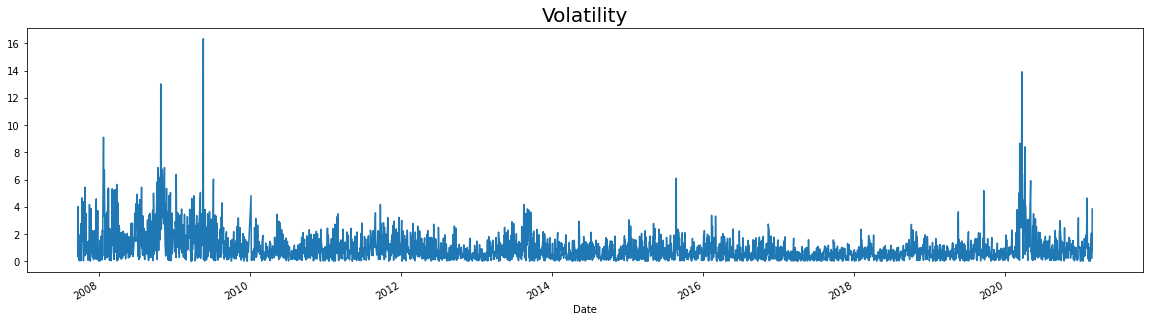

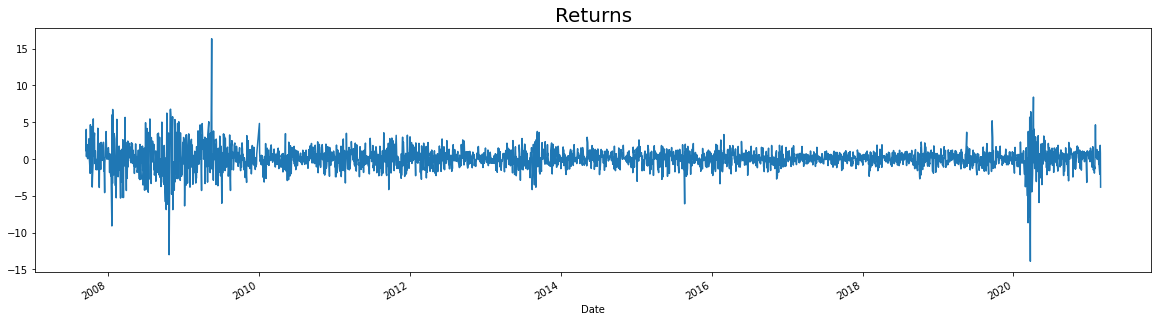

In [35]:
nifty['daily_realized_volatility'].plot(figsize=(20,5))
plt.title('Volatility',size=20)
plt.show();

nifty['returns'].plot(figsize=(20,5))
plt.title('Returns',size=20)
plt.show();

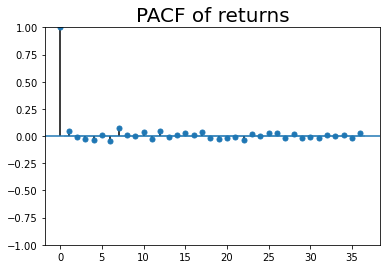

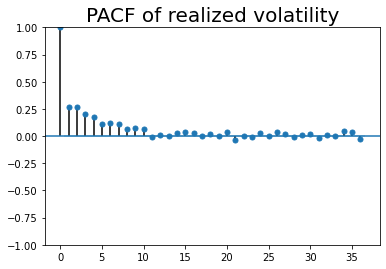

In [36]:
### Plotting ACF and PACF
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_pacf(nifty['returns'], alpha = 0.5)
plt.title('PACF of returns', size =20)
plt.show();

plot_pacf(nifty['daily_realized_volatility'], alpha = 0.5)
plt.title('PACF of realized volatility', size =20)
plt.show();

**Questions**:
- What can you infer from the PACF plot of volatility?
- What approach can help model such an effect?

<br>

### Train-test split

In [37]:
# Train-Test split: 
# We assume that our training data is till 2021-1-31
# Test data is from 2021-2-01 till end

from pandas.tseries.offsets import BDay

train_end_date = pd.to_datetime('2021-1-31')

test_start_date = train_end_date + BDay(1)
test_start_date

test_end_date = nifty.index[-1]
test_end_date

Timestamp('2021-02-01 00:00:00')

Timestamp('2021-02-26 00:00:00')

<br>

### Experimenting with ARCH(p) and GARCH(p,q)

In [38]:
from arch import arch_model

In [39]:
# mean model: Zero
# Volatility model: ARCH
# Distribution of returns: Normal

model = arch_model(nifty['returns'], mean='Zero', vol='ARCH', dist='Normal', p = 1)

# We set last_obs = train_end_date to train the model on the training data only
results = model.fit(update_freq=10,last_obs= train_end_date )

results.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 5493.505976824846
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -5493.51
Distribution:                  Normal   AIC:                           10991.0
Method:            Maximum Likelihood   BIC:                           11003.2
                                        No. Observations:                 3264
Date:                Wed, Oct 13 2021   Df Residuals:                     3264
Time:                        18:49:43   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.1817  7.446e-02     15.871  1.007e-56 [  1.036,  1.328]
alpha[1]       0.4735  8.402e-02      5.636  1.745e-08 [  0.309,  0.638]
========================================================================

Covariance estimator: robust
"""

In [40]:
# mean model: Constant mean
# Volatility model: ARCH
# Distribution of returns: Normal

model = arch_model(nifty['returns'], mean='Constant', vol='ARCH', dist='Normal', p = 1)
results = model.fit(update_freq=10,last_obs= train_end_date )
results.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 5491.839330938326
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -5491.84
Distribution:                  Normal   AIC:                           10989.7
Method:            Maximum Likelihood   BIC:                           11008.0
                                        No. Observations:                 3264
Date:                Wed, Oct 13 2021   Df Residuals:                     3263
Time:                        18:49:43   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0379  2.350e-02      1.613      0.107 [-8.154e-03,8.398e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.1794  7.502e-02     15.720  1.103e-55 [  1.032,  1.326]
alpha[1]       0.4758  8.478e-02      5.613  1.993e-08 [  0.310,  0.642]
========================================================================

Covariance estimator: robust
"""

In [41]:
# mean model: Constant
# Volatility model: GARCH(1,1)
# Distribution of returns: Normal

model = arch_model(nifty['returns'], mean='Constant', vol='GARCH', dist='Normal', p = 1, q=1)
results = model.fit(update_freq=10,last_obs= train_end_date )
results.summary()

Iteration:     10,   Func. Count:     63,   Neg. LLF: 5019.602650431358
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5019.602504957482
            Iterations: 12
            Function evaluations: 72
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5019.60
Distribution:                  Normal   AIC:                           10047.2
Method:            Maximum Likelihood   BIC:                           10071.6
                                        No. Observations:                 3264
Date:                Wed, Oct 13 2021   Df Residuals:                     3263
Time:                        18:49:43   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0701  1.751e-02      4.002  6.271e-05 [3.575e-02,  0.104]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0153  5.340e-03      2.867  4.142e-03 [4.845e-03,2.578e-02]
alpha[1]       0.0913  1.415e-02      6.455  1.080e-10   [6.360e-02,  0.119]
beta[1]        0.9029  1.304e-02     69.223      0.000     [  0.877,  0.928]
============================================================================

Covariance estimator: robust
"""

In [42]:
# mean model: AR(1)
# Volatility model: GARCH(1,1)
# Distribution of returns: Normal

model = arch_model(nifty['returns'], mean='AR', lags=1, vol='GARCH', dist='Normal', p = 1, q=1)
results = model.fit(update_freq=10,last_obs= train_end_date )
results.summary()

Iteration:     10,   Func. Count:     78,   Neg. LLF: 5011.62358823925
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5011.6220572254615
            Iterations: 13
            Function evaluations: 95
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                returns   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -5011.62
Distribution:                  Normal   AIC:                           10033.2
Method:            Maximum Likelihood   BIC:                           10063.7
                                        No. Observations:                 3263
Date:                Wed, Oct 13 2021   Df Residuals:                     3261
Time:                        18:49:43   Df Model:                            2
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0657  1.743e-02      3.772  1.622e-04 [3.158e-02,9.991e-02]
returns[1]     0.0655  1.854e-02      3.532  4.132e-04   [2.914e-02,  0.102]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0154  5.261e-03      2.929  3.396e-03 [5.100e-03,2.572e-02]
alpha[1]       0.0912  1.413e-02      6.456  1.075e-10   [6.354e-02,  0.119]
beta[1]        0.9028  1.293e-02     69.802      0.000     [  0.877,  0.928]
============================================================================

Covariance estimator: robust
"""

In [43]:
# mean model: AR(1)
# Volatility model: GARCH(2,2)
# Distribution of returns: Normal

model = arch_model(nifty['returns'], mean='AR', lags=1, vol='GARCH', dist='Normal', p = 2, q=2)
results = model.fit(update_freq=10,last_obs= train_end_date )
results.summary()

Iteration:     10,   Func. Count:     99,   Neg. LLF: 5026.62735722883
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5008.361092501475
            Iterations: 16
            Function evaluations: 151
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                returns   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -5008.36
Distribution:                  Normal   AIC:                           10030.7
Method:            Maximum Likelihood   BIC:                           10073.4
                                        No. Observations:                 3263
Date:                Wed, Oct 13 2021   Df Residuals:                     3261
Time:                        18:49:43   Df Model:                            2
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0667  1.747e-02      3.819  1.342e-04   [3.246e-02,  0.101]
returns[1]     0.0631  1.811e-02      3.483  4.951e-04 [2.760e-02,9.860e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0287  9.744e-03      2.942  3.263e-03 [9.567e-03,4.776e-02]
alpha[1]       0.0619  2.526e-02      2.452  1.420e-02   [1.243e-02,  0.111]
alpha[2]       0.1041  2.955e-02      3.522  4.279e-04   [4.617e-02,  0.162]
beta[1]        0.1747      0.222      0.788      0.431     [ -0.260,  0.609]
beta[2]        0.6482      0.203      3.190  1.422e-03     [  0.250,  1.046]
============================================================================

Covariance estimator: robust
"""

In [44]:
# mean model: AR(1)
# Volatility model: GARCH(1,1)
# Distribution of returns: t

model = arch_model(nifty['returns'], mean='AR', lags=1, vol='GARCH', dist='t', p = 1, q=1)
results = model.fit(update_freq=10,last_obs= train_end_date )
results.summary()

Iteration:     10,   Func. Count:     89,   Neg. LLF: 4938.322006180206
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4938.314588597076
            Iterations: 14
            Function evaluations: 116
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:                      returns   R-squared:                       0.001
Mean Model:                              AR   Adj. R-squared:                  0.001
Vol Model:                            GARCH   Log-Likelihood:               -4938.31
Distribution:      Standardized Student's t   AIC:                           9888.63
Method:                  Maximum Likelihood   BIC:                           9925.17
                                              No. Observations:                 3263
Date:                      Wed, Oct 13 2021   Df Residuals:                     3261
Time:                              18:49:43   Df Model:                            2
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0648  1.631e-02      3.973  7.091e-05 [3.283e-02,9.675e-02]
returns[1]     0.0649  1.690e-02      3.839  1.235e-04 [3.175e-02,9.798e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0160  4.212e-03      3.793  1.488e-04 [7.721e-03,2.423e-02]
alpha[1]       0.0780  1.041e-02      7.499  6.415e-14 [5.764e-02,9.843e-02]
beta[1]        0.9127  1.038e-02     87.943      0.000     [  0.892,  0.933]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             7.1568      0.929      7.704  1.321e-14 [  5.336,  8.978]
========================================================================

Covariance estimator: robust
"""

In [45]:
# mean model: Constant mean
# Volatility model: GARCH(1,1)
# Distribution of returns: t

model = arch_model(nifty['returns'], mean='AR', lags=0, vol='GARCH', dist='t', p = 1, q=1)
results = model.fit(update_freq=10,last_obs= train_end_date )
results.summary()

Iteration:     10,   Func. Count:     76,   Neg. LLF: 4946.943305192539
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4946.943242912832
            Iterations: 13
            Function evaluations: 93
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:                      returns   R-squared:                       0.000
Mean Model:                              AR   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -4946.94
Distribution:      Standardized Student's t   AIC:                           9903.89
Method:                  Maximum Likelihood   BIC:                           9934.34
                                              No. Observations:                 3264
Date:                      Wed, Oct 13 2021   Df Residuals:                     3263
Time:                              18:49:43   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.0706  1.619e-02      4.361  1.294e-05 [3.888e-02,  0.102]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0160  4.216e-03      3.784  1.541e-04 [7.691e-03,2.422e-02]
alpha[1]       0.0785  1.042e-02      7.537  4.810e-14 [5.811e-02,9.895e-02]
beta[1]        0.9123  1.038e-02     87.932      0.000     [  0.892,  0.933]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             7.2668      0.958      7.587  3.270e-14 [  5.390,  9.144]
========================================================================

Covariance estimator: robust
"""

**Questions**:
- Which model performs best according to AIC?
- How feasible is the assumption of normality of asset returns?

<br>

### Prediction/forecasting with GARCH model

In [46]:
# BEST MODEL
# mean model: AR(1)
# Volatility model: GARCH(1,1)
# Distribution of returns: t

best_model = arch_model(nifty['returns'], mean='AR', lags=1, vol='GARCH', dist='t', p = 1, q=1, rescale = True)
results = best_model.fit(update_freq=10,last_obs= train_end_date )
results.summary()

Iteration:     10,   Func. Count:     89,   Neg. LLF: 4938.322006180206
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4938.314588597076
            Iterations: 14
            Function evaluations: 116
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                              AR - GARCH Model Results                              
====================================================================================
Dep. Variable:                      returns   R-squared:                       0.001
Mean Model:                              AR   Adj. R-squared:                  0.001
Vol Model:                            GARCH   Log-Likelihood:               -4938.31
Distribution:      Standardized Student's t   AIC:                           9888.63
Method:                  Maximum Likelihood   BIC:                           9925.17
                                              No. Observations:                 3263
Date:                      Wed, Oct 13 2021   Df Residuals:                     3261
Time:                              18:49:43   Df Model:                            2
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0648  1.631e-02      3.973  7.091e-05 [3.283e-02,9.675e-02]
returns[1]     0.0649  1.690e-02      3.839  1.235e-04 [3.175e-02,9.798e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0160  4.212e-03      3.793  1.488e-04 [7.721e-03,2.423e-02]
alpha[1]       0.0780  1.041e-02      7.499  6.415e-14 [5.764e-02,9.843e-02]
beta[1]        0.9127  1.038e-02     87.943      0.000     [  0.892,  0.933]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             7.1568      0.929      7.704  1.321e-14 [  5.336,  8.978]
========================================================================

Covariance estimator: robust
"""

In [47]:
# PREDICTIONS
# horizon: how many observations we want our model to predict for each date
# horizon =1 means that for each date, we get the predicted value for the next date only
# align: determines whether we match the value with the date the prediction is mode on(origin) or the day it is repesents(target)

In [48]:
# Next day forecast using align='origin'
pred_next_day = results.forecast(horizon=1, align='origin')
# Predicting the variance for test data duration
pred_next_day.residual_variance[test_start_date:test_end_date]

h.1
Date                
2021-02-01  2.877742
2021-02-02  3.009872
2021-02-03  2.805448
2021-02-04  2.603251
2021-02-05  2.392532
2021-02-08  2.311701
2021-02-09  2.128750
2021-02-10  1.959441
2021-02-11  1.815530
2021-02-12  1.675032
2021-02-15  1.612742
2021-02-16  1.489435
2021-02-17  1.419232
2021-02-18  1.340715
2021-02-19  1.308322
2021-02-22  1.544350
2021-02-23  1.431993
2021-02-24  1.566956
2021-02-25  1.472636
2021-02-26  2.578048

In [49]:
# Predicting the variance for test data duration for the day it represents using align='target'
pred = results.forecast(horizon=1, align='target')
pred.residual_variance[test_start_date:test_end_date]

h.1
Date                
2021-02-01  1.282845
2021-02-02  2.877742
2021-02-03  3.009872
2021-02-04  2.805448
2021-02-05  2.603251
2021-02-08  2.392532
2021-02-09  2.311701
2021-02-10  2.128750
2021-02-11  1.959441
2021-02-12  1.815530
2021-02-15  1.675032
2021-02-16  1.612742
2021-02-17  1.489435
2021-02-18  1.419232
2021-02-19  1.340715
2021-02-22  1.308322
2021-02-23  1.544350
2021-02-24  1.431993
2021-02-25  1.566956
2021-02-26  1.472636

In [50]:
pred.variance[test_start_date:test_end_date]

h.1
Date                
2021-02-01  1.282845
2021-02-02  2.877742
2021-02-03  3.009872
2021-02-04  2.805448
2021-02-05  2.603251
2021-02-08  2.392532
2021-02-09  2.311701
2021-02-10  2.128750
2021-02-11  1.959441
2021-02-12  1.815530
2021-02-15  1.675032
2021-02-16  1.612742
2021-02-17  1.489435
2021-02-18  1.419232
2021-02-19  1.340715
2021-02-22  1.308322
2021-02-23  1.544350
2021-02-24  1.431993
2021-02-25  1.566956
2021-02-26  1.472636

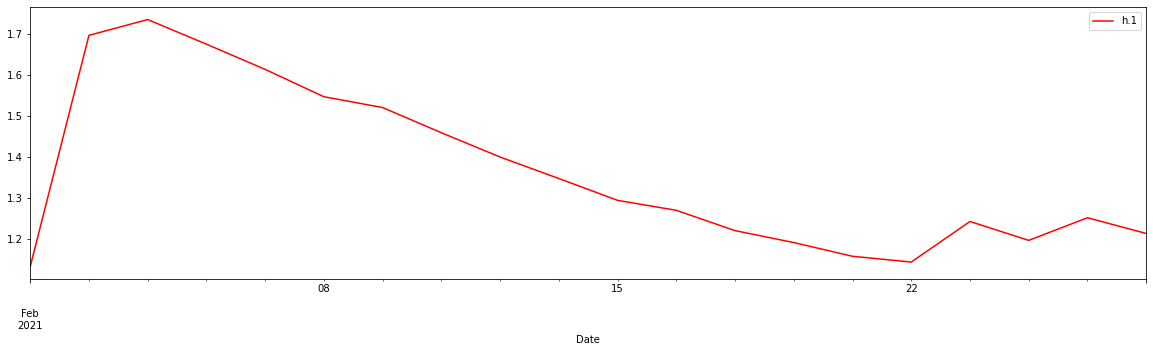

In [51]:
# plotting predicted volatility
np.sqrt(pred.residual_variance[test_start_date:test_end_date]).plot(figsize=(20,5), color='red');

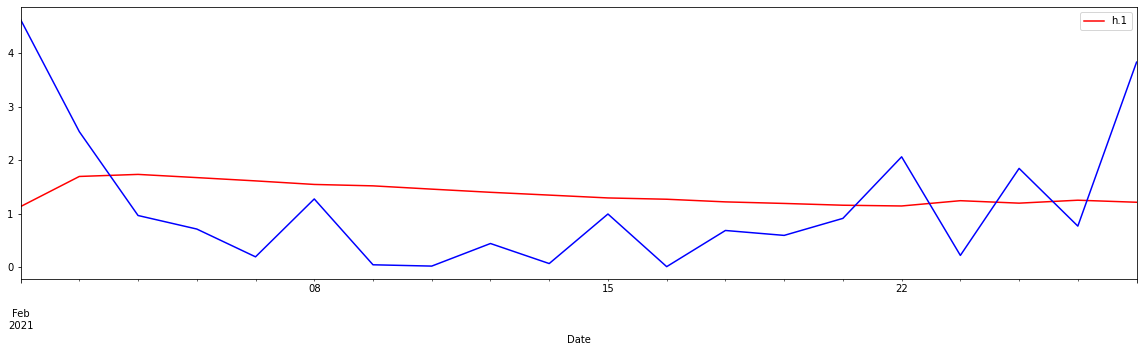

In [52]:
# plotting volatility prediction vs actual observed volatility on the test dataset
np.sqrt(pred.residual_variance[test_start_date:test_end_date]).plot(figsize=(20,5), color='red');
nifty['daily_realized_volatility'][test_start_date:test_end_date].plot(figsize=(20,5), color='blue');

<br>

## References

- Tsay, Ruey S. Analysis of financial time series. Vol. 543. John Wiley & Sons (2005).
- https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html
- https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html
- https://www.researchgate.net/publication/222105759_Automatic_Time_Series_Forecasting_The_forecast_Package_for_R
- https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_modeling.html
- https://www.quantstart.com/articles/Generalised-Autoregressive-Conditional-Heteroskedasticity-GARCH-p-q-Models-for-Time-Series-Analysis/
- EPAT ASQ 02 lecture by Vivek Krishnamoorthy
- Cont, Rama. (2002). Empirical Properties of Asset Returns: Stylized Facts and Statistical Issues. Quantitative Finance. 1. 223-236. 10.1088/1469-7688/1/2/304. 
:https://www.researchgate.net/publication/227623841_Empirical_Properties_of_Asset_Returns_Stylized_Facts_and_Statistical_Issues
- “WHY IS IT SO HARD TO ESTIMATE EXPECTED RETURNS?” (2012). https://www-users.cse.umn.edu/~dodso013/docs/dodson2012-lambda.pdf
- https://www.lazardassetmanagement.com/docs/-m0-/22430/predictingvolatility_lazardresearch_en.pdf
